In [ ]:
%pip install matplotlib

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from sklearn.linear_model import LinearRegression
df=pd.read_csv('DataGrade-Set_1.csv')
df.loc[9] = {'Hours_studied':3, 'Test_grades': 90}


x = df['Hours_studied'].values[:, np.newaxis]
y=df.Test_grades.values
lr = LinearRegression()
lr.fit(x,y)
print("Intercept:",lr.intercept_)
print("Coeffecient:",lr.coef_)

m = lr.coef_[0]
c = lr.intercept_

print("Manual prediction:", m * 6 + c)

print("Built in function:",lr.predict([[6]]))

Intercept: 52.62082405345212
Coeffecient: [5.09521158]
Manual prediction: 83.19209354120267
Built in function: [83.19209354]


Text(0.5, 0, 'Hours_Studied')

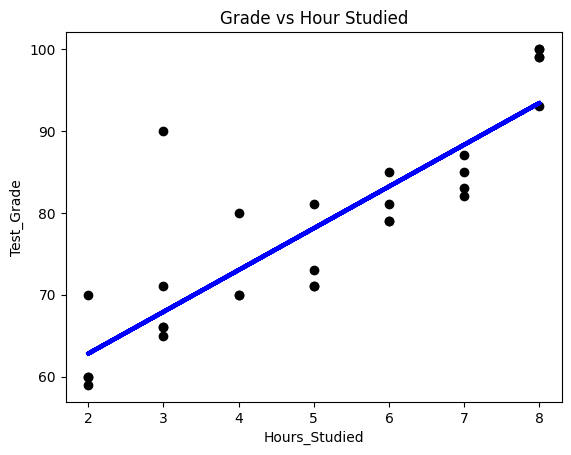

In [30]:
plt.scatter(x,y,color='black')
plt.plot(x,lr.predict(x),color='blue',linewidth=3)
plt.title("Grade vs Hour Studied")
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

In [31]:

df['Test_Grade_Pred']=lr.predict(x)

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


print("R Squared:",r2_score(df.Test_grades,df.Hours_studied))
print("Mean Absolut Error:",mean_absolute_error(df.Test_grades,df.Hours_studied))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(df.Test_grades,df.Hours_studied)))


R Squared: -36.15735795637347
Mean Absolut Error: 73.37931034482759
Root Mean Squared Error: 74.11547374385367


R Squared: 0.8178446161192845
Mean Absolute Error: 3.7943299690896963
Root Mean Squared Error: 5.189284505851012


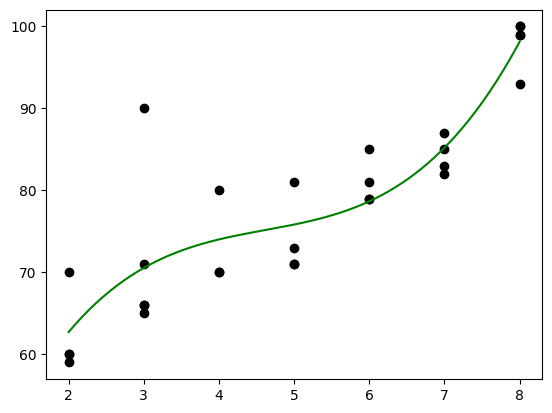

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = df[['Hours_studied']].values  # or df[['Hours_studied']]
y = df['Test_grades'].values

degree=3
model=make_pipeline(PolynomialFeatures(degree),lr)
model.fit(x,y)

x_range = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
y_range_pred = model.predict(x_range)

# Plot with smooth curve
plt.scatter(x, y, color='black')
plt.plot(x_range, y_range_pred, color='green')  # instead of plt.plot(x, model.predict(x))

# Correct metrics
y_pred = model.predict(x)
print("R Squared:", r2_score(y, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y, y_pred)))
